In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Đường dẫn đến các tệp Excel
file_path1 = "../Data/Data1.csv"
file_path2 = "../Data/Data2.csv"
file_path3 = "../Data/Data3.csv"
file_path4 = "../Data/Data4.csv"
file_path5 = "../Data/Data5.csv"
file_path6 = "../Data/Data6.csv"
file_path7 = "../Data/ha-noi-weather.csv"

In [3]:
#Đọc file CSV và lưu vào DataFrame
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)
df3 = pd.read_csv(file_path3)
df4 = pd.read_csv(file_path4)
df5 = pd.read_csv(file_path5)
df6 = pd.read_csv(file_path6)
df7 = pd.read_csv(file_path7)


In [4]:
df7.drop(columns=['Weather'], inplace=True)

df7['Date'] = df7['Date'].astype('datetime64[ns]')
df7['Temp'] = df7['Temp'].str.replace('°c', '').str.strip()
df7['Rain'] = df7['Rain'].str.replace('\nmm', '').str.strip()
df7['Cloud'] = df7['Cloud'].str.replace('%', '').str.strip()
df7['Pressure'] = df7['Pressure'].str.replace('mb', '').str.strip()
df7['Wind'] = df7['Wind'].str.replace('km/h', '').str.strip()
df7['Gust'] = df7['Gust'].str.replace('km/h', '').str.strip()

df7 = df7[df7['Date'] >= '2015-01-01'].reset_index(drop=True)

df7 = df7.astype({
    'Temp': 'float64',
    'Rain': 'float64',
    'Cloud': 'float64',
    'Pressure': 'float64',
    'Wind': 'float64',
    'Gust': 'float64'
})

df7 = df7.groupby('Date')[['Temp', 'Rain', 'Cloud', 'Pressure', 'Wind', 'Gust']].mean().round(2).reset_index()
df7.head(5)

,Date,Temp,Rain,Cloud,Pressure,Wind,Gust
0,2015-01-01,17.50,0.00,0.00,1023.50,7.12,12.62
1,2015-01-02,17.38,0.00,5.88,1022.38,6.25,9.12
2,2015-01-03,17.00,0.00,41.25,1019.50,5.75,8.50
3,2015-01-04,19.62,0.01,62.38,1013.50,7.62,13.75
4,2015-01-05,21.88,0.00,64.00,1010.62,6.75,10.12


In [6]:
df5.head(5)

,Date,pm25,pm10,o3,no2,so2,co
0,1/1/2015,0.0,124.0,22.0,40.0,6.0,28.0
1,1/2/2015,186.0,144.0,69.0,39.0,8.0,43.0
2,1/3/2015,227.0,151.0,24.0,25.0,12.0,28.0
3,1/4/2015,253.0,0.0,0.0,0.0,0.0,0.0
4,1/5/2015,0.0,115.0,65.0,35.0,5.0,33.0


In [7]:
#Tạo bảng df trống
timestamps = pd.date_range(start='2015-01-01', end='2025-04-17', freq='d')
values = [0.0 for i in range(len(timestamps))]

df = pd.DataFrame({
        'Date': timestamps,
        'co': values,
        'no2': values,
        'o3': values,
        'pm10': values,
        'pm25': values,
        'so2': values
    })
df.head(5)

,Date,co,no2,o3,pm10,pm25,so2
0,2015-01-01,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-02,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-03,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-04,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-05,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for source_df in [df1, df2, df3, df4, df5, df6]:
    source_df.loc[(source_df['o3'] >= 200), 'o3'] = 0.0
    source_df.loc[(source_df['no2'] >= 120), 'no2'] = 0.0

In [9]:
#Định dạng lại các kiểu dữ liệu trong các cột
for source_df in [df1, df2, df3, df4, df5, df6]:
    source_df['Date'] = source_df['Date'].astype('datetime64[ns]')
    source_df['co'] = source_df['co'].astype(float)
    source_df['no2'] = source_df['no2'].astype(float)
    source_df['o3'] = source_df['o3'].astype(float)
    source_df['pm10'] = source_df['pm10'].astype(float)
    source_df['pm25'] = source_df['pm25'].astype(float)
    source_df['so2'] = source_df['so2'].astype(float)


In [10]:
#Tính các giá trị tương ứng và trung bình các điểm đo được trong các điểm đo khác nhau
for feature in ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']:
    for i in range(len(df)):
        time = df.loc[i, 'Date']
        values = []

        for source_df in [df1, df2, df3, df4, df5, df6]:
            match = source_df[source_df['Date'] == time]
            if not match.empty:
                val = match[feature].values[0]
                if val != 0:  # Bỏ qua các giá trị 0
                    values.append(val)

        if values:
            df.loc[i, feature] = round(sum(values) / len(values), 2)

df.head(10)

,Date,co,no2,o3,pm10,pm25,so2
0,2015-01-01,28.0,40.0,22.0,124.0,0.0,6.0
1,2015-01-02,43.0,39.0,69.0,144.0,186.0,8.0
2,2015-01-03,28.0,25.0,24.0,151.0,227.0,12.0
3,2015-01-04,0.0,0.0,0.0,0.0,253.0,0.0
4,2015-01-05,33.0,35.0,65.0,115.0,0.0,5.0
5,2015-01-06,27.0,30.0,46.0,85.0,188.0,3.0
6,2015-01-07,27.0,28.0,20.0,80.0,167.0,10.0
7,2015-01-08,22.0,23.0,29.0,75.0,163.0,7.0
8,2015-01-09,32.0,32.0,21.0,103.0,165.0,12.0
9,2015-01-10,25.0,20.0,17.0,115.0,189.0,6.0


In [11]:
(df == 0).sum()

Date       0
co      1139
no2     1023
o3       998
pm10     834
pm25     813
so2     1031
dtype: int64

"Có thể thấy còn nhiều giá trị chưa được điền vào và giữ nguyên là không, điều này liên quan đến việc thu thập dữ liệu của các sensor, như mất điện, mất tín hiệu..., chúng ta sẽ điền vào những giá trị bị thiếu bằng các giá trị trung bình ứng với ngày trong tuần và thêm vào 1 chút nhiễu động."

In [12]:
# Thêm cột "Day of Year" (0: thứ Hai, ..., 6: Chủ Nhật)
df['Day of Year'] = df['Date'].dt.dayofyear

# Hàm tính giá trị trung bình cho cùng ngày trong tuần
def calculate_avg(day_of_week, column):
    filtered_data = df[(df['Day of Year'] == day_of_week) & (df[column] != 0)]
    return filtered_data[column].mean() if len(filtered_data) > 0 else np.nan

# Thay thế giá trị 0 bằng giá trị trung bình và một chút nhiễu động ngẫu nhiên
for index, row in df.iterrows():
    for column in ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']:
        if row[column] == 0:
            avg_value = calculate_avg(row['Day of Year'], column)
            if not np.isnan(avg_value):
                df.at[index, column] = round(avg_value * (1 + np.random.uniform(-0.5, 0.5)),2)
            else:
                print(f"Không có dữ liệu để tính trung bình cho {column} vào {row['Day of Year']}")

df.drop(columns=['Day of Year'], inplace=True)


In [13]:
(df == 0).sum()


Date    0
co      0
no2     0
o3      0
pm10    0
pm25    0
so2     0
dtype: int64

Các cột cho thấy tất cả các giá trị đo từ 29/1/2024 lúc 23:00 đến 17/04/2025 lúc 00:00 đều đầy đủ và không có giá trị đo nào khác 0.

In [14]:
#Kết hợp với dữ liệu thời tiết
df = pd.merge(df, df7, on='Date', how='inner')

In [15]:
#Lưu data sau khi được làm sạch lại thành final data để training model
df.to_csv('../Data/FinalData.csv', index=False, header=True)

Vậy là đã hoàn thành việc chuẩn bị data!

In [16]:
df.describe()

,Date,co,no2,o3,pm10,pm25,so2,Temp,Rain,Cloud,Pressure,Wind,Gust
count,3759,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000
mean,2020-02-22 23:59:59.999999744,10.848992,17.112493,15.974589,43.234922,83.845536,11.407007,24.570168,0.253469,61.093740,1011.253730,9.439641,15.817720
min,2015-01-01 00:00:00,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.880000,0.000000,0.000000,992.000000,3.000000,5.000000
25%,2017-07-28 12:00:00,6.000000,11.000000,7.960000,28.000000,52.330000,6.235000,20.880000,0.000000,42.750000,1005.250000,7.000000,12.440000
50%,2020-02-23 00:00:00,8.500000,16.500000,12.000000,41.000000,79.350000,10.720000,25.620000,0.020000,65.750000,1011.120000,9.000000,15.250000
75%,2022-09-19 12:00:00,12.650000,23.125000,19.000000,56.000000,112.000000,14.985000,28.500000,0.240000,80.880000,1016.620000,11.500000,18.620000
max,2025-04-16 00:00:00,102.000000,75.000000,196.000000,187.000000,299.000000,50.000000,34.620000,8.320000,100.000000,1037.250000,29.620000,54.000000
std,NaN,8.439923,9.424163,16.474920,21.610848,42.240142,7.105541,5.046979,0.565423,26.422961,7.124891,3.121987,4.669963


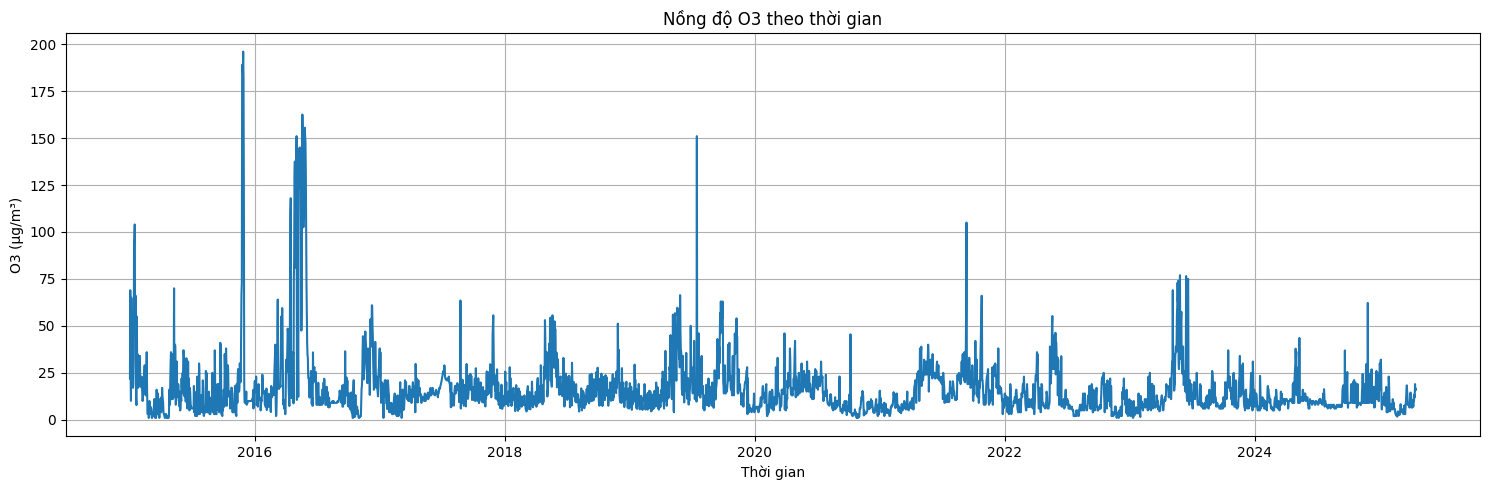

In [17]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Date', y='o3')
plt.title('Nồng độ O3 theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('O3 (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.savefig(f'../Visualization/Data_after_process/o3_processed.png')
plt.show()

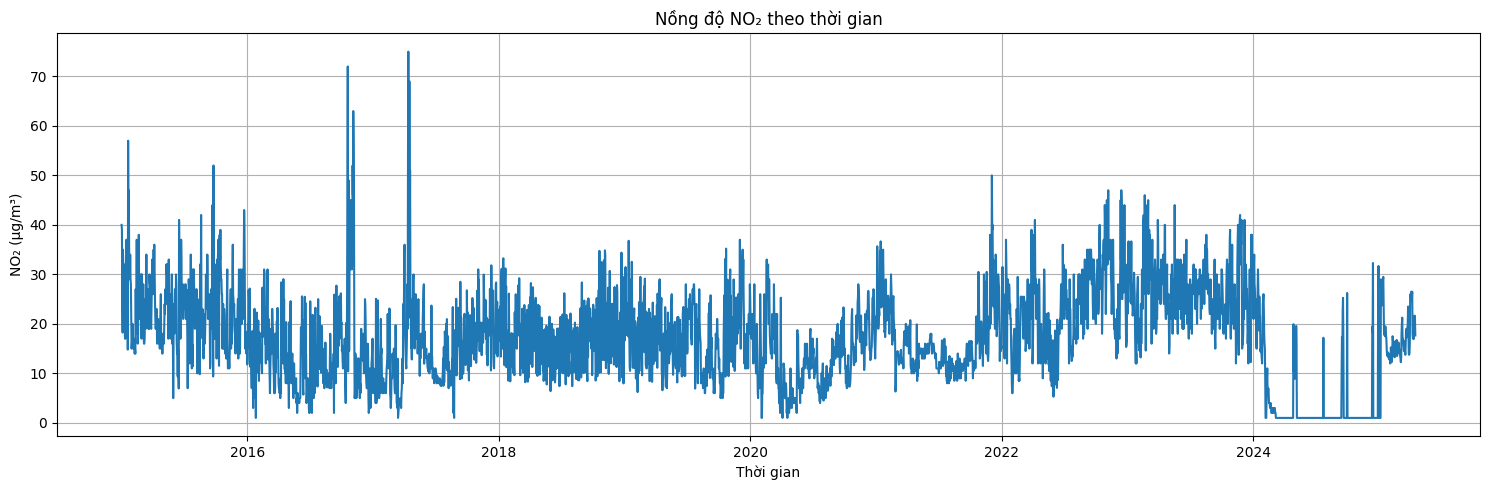

In [18]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Date', y='no2')
plt.title('Nồng độ NO₂ theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('NO₂ (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.savefig(f'../Visualization/Data_after_process/no2_processed.png')
plt.show()

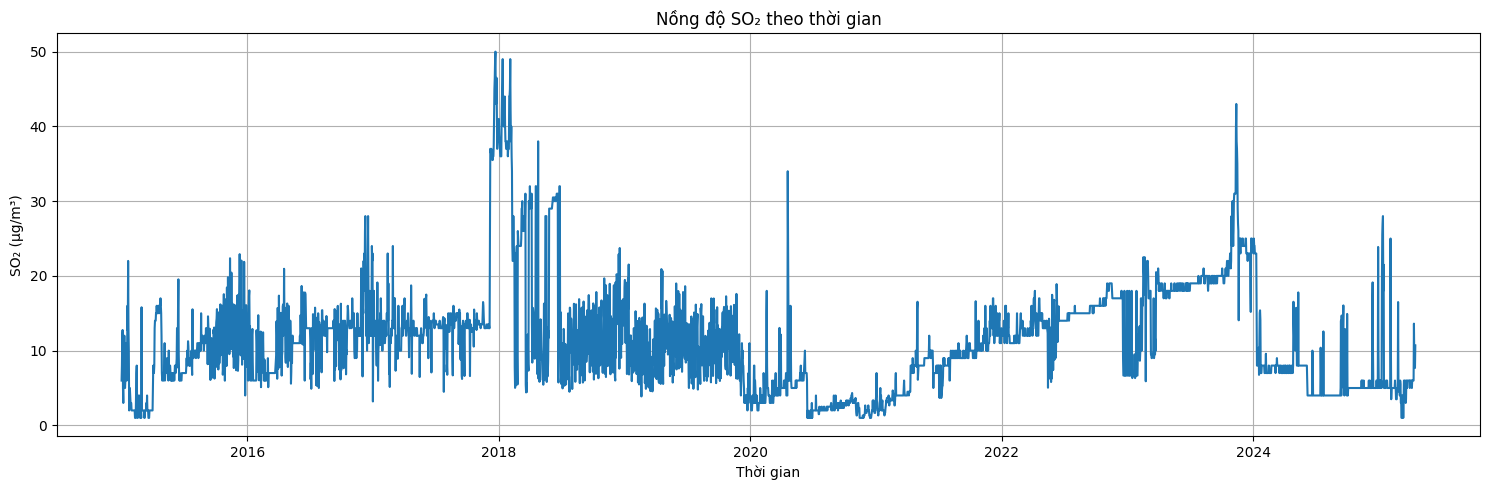

In [19]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Date', y='so2')
plt.title('Nồng độ SO₂ theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('SO₂ (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.savefig(f'../Visualization/Data_after_process/so2_processed.png')
plt.show()

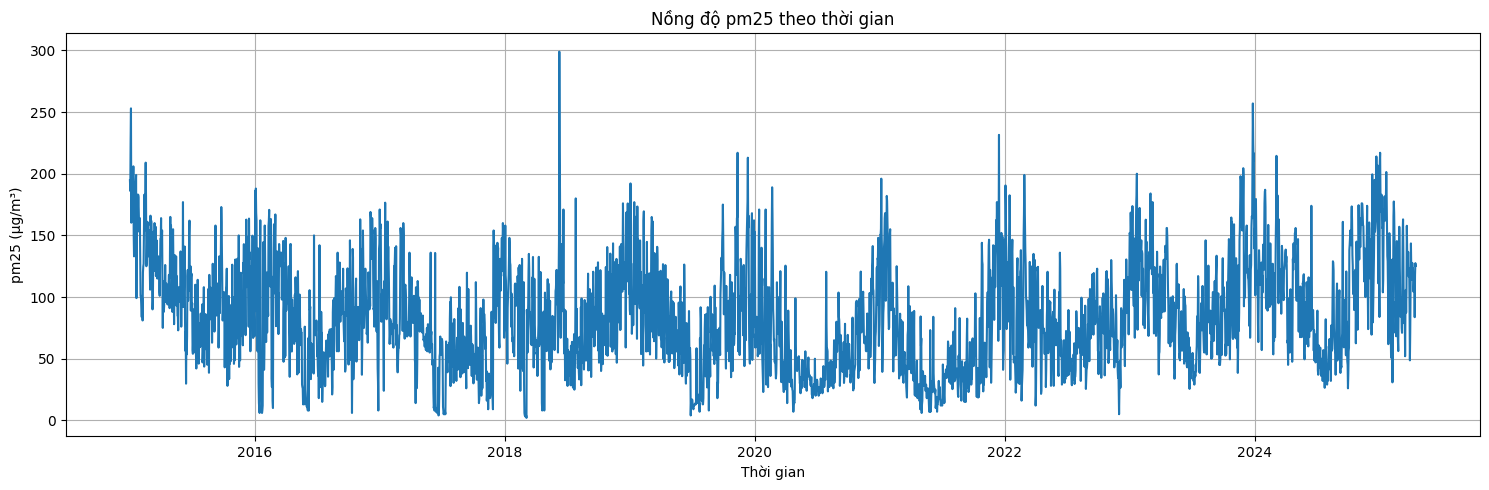

In [20]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Date', y='pm25')
plt.title('Nồng độ pm25 theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('pm25 (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.savefig(f'../Visualization/Data_after_process/pm25_processed.png')
plt.show()

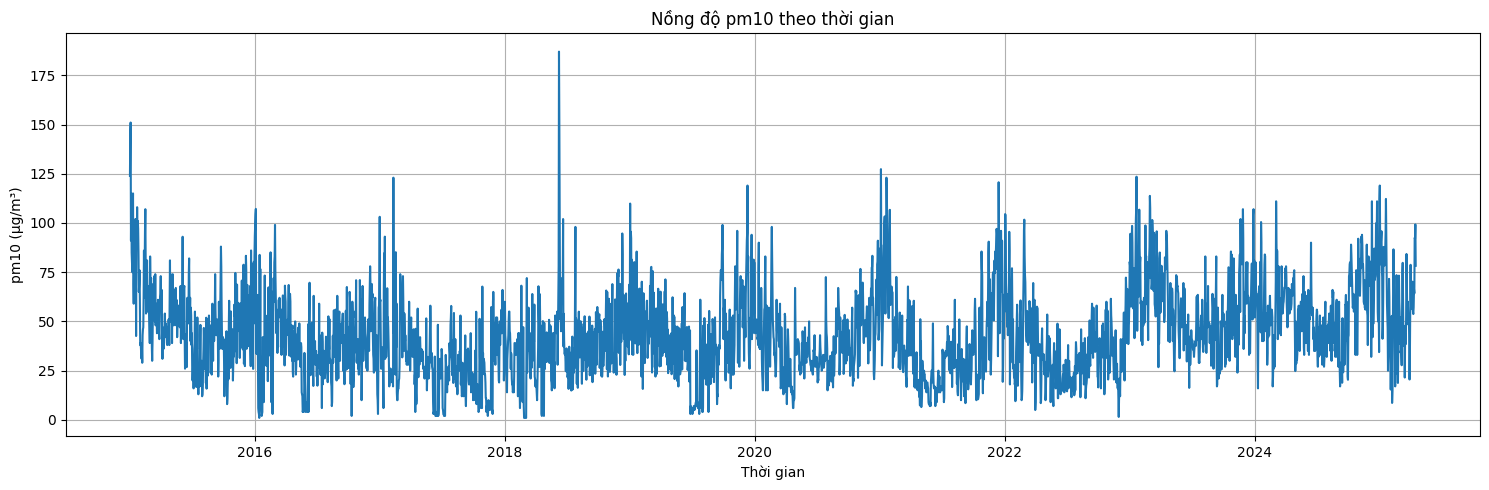

In [21]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Date', y='pm10')
plt.title('Nồng độ pm10 theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('pm10 (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.savefig(f'../Visualization/Data_after_process/pm10_processed.png')
plt.show()

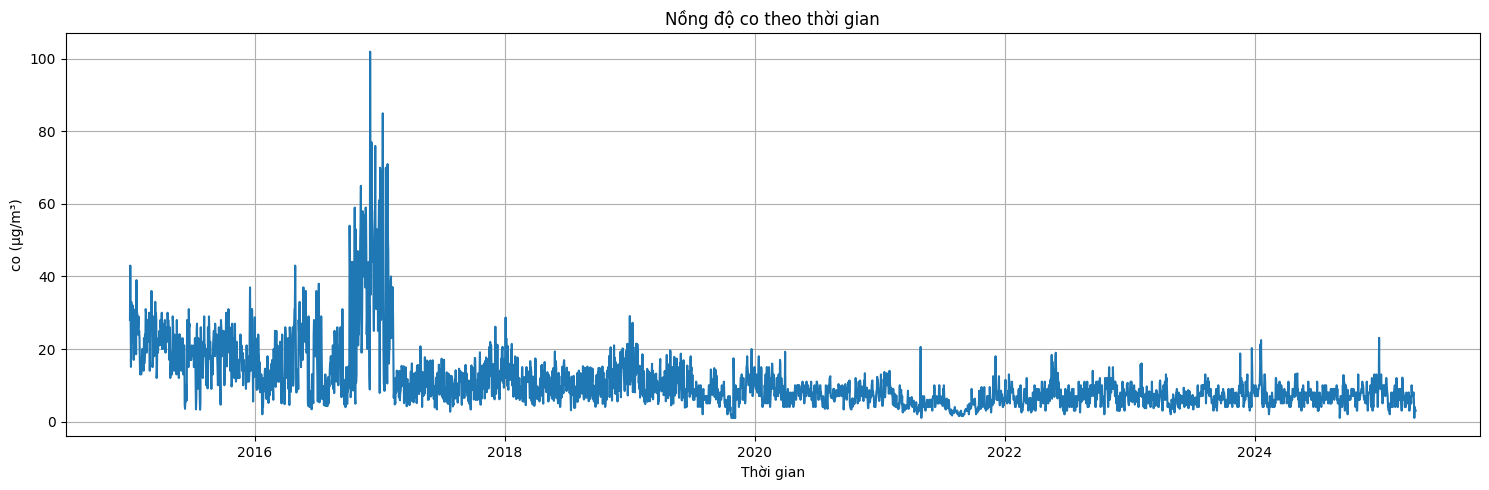

In [22]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Date', y='co')
plt.title('Nồng độ co theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('co (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.savefig(f'../Visualization/Data_after_process/co_processed.png')
plt.show()

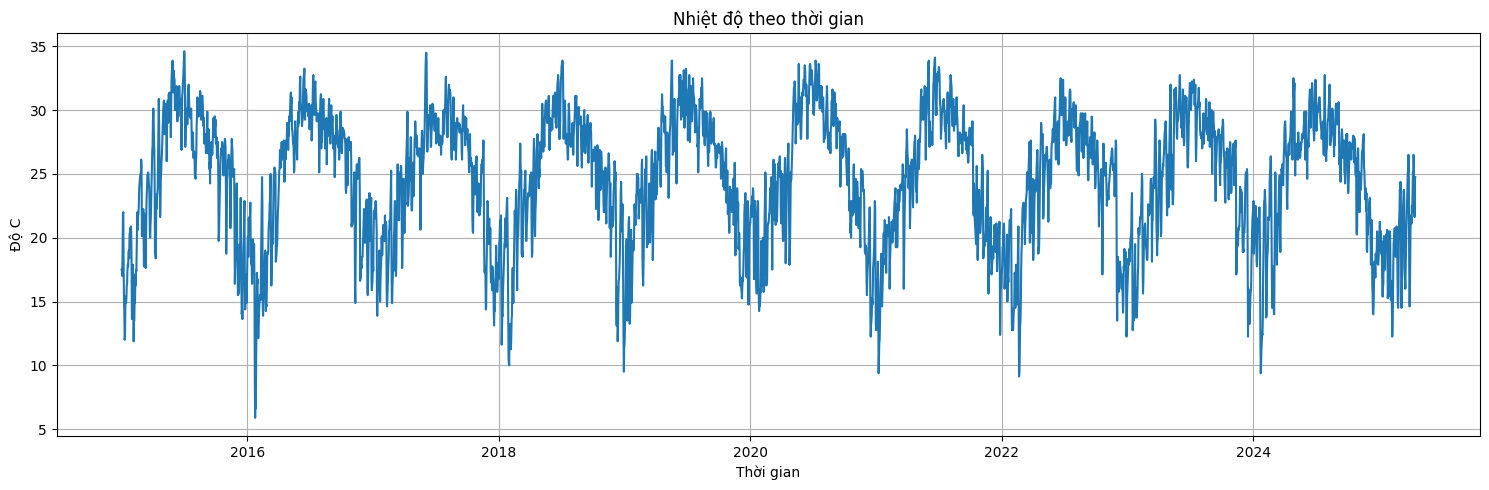

In [23]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Date', y='Temp')
plt.title('Nhiệt độ theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Độ C')
plt.grid(True)
plt.tight_layout()
plt.savefig(f'../Visualization/Data_after_process/Temp_processed.png')
plt.show()

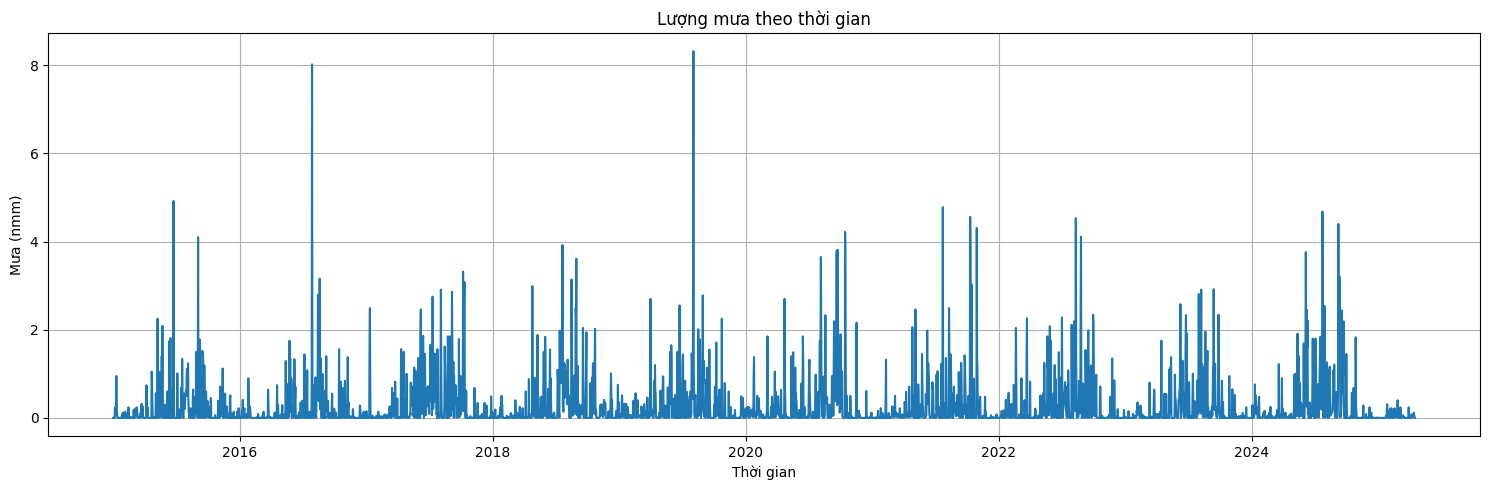

In [24]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Date', y='Rain')
plt.title('Lượng mưa theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Mưa (nmm)')
plt.grid(True)
plt.tight_layout()
plt.savefig(f'../Visualization/Data_after_process/Rain_processed.png')
plt.show()

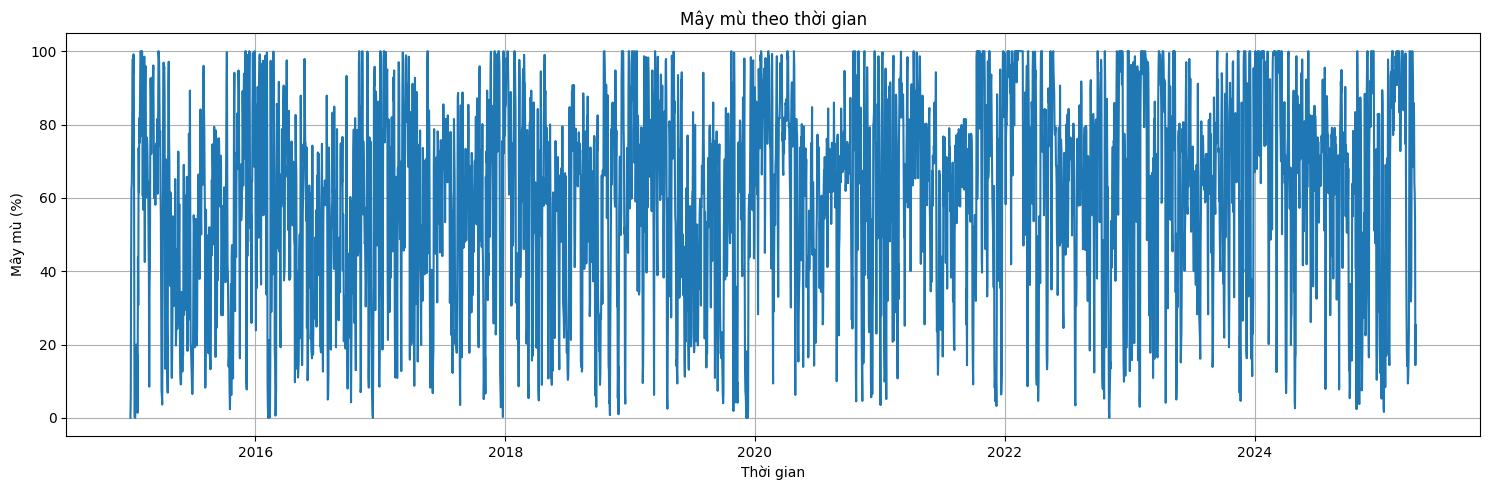

In [25]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Date', y='Cloud')
plt.title('Mây mù theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Mây mù (%)')
plt.grid(True)
plt.tight_layout()
plt.savefig(f'../Visualization/Data_after_process/Cloud_processed.png')
plt.show()

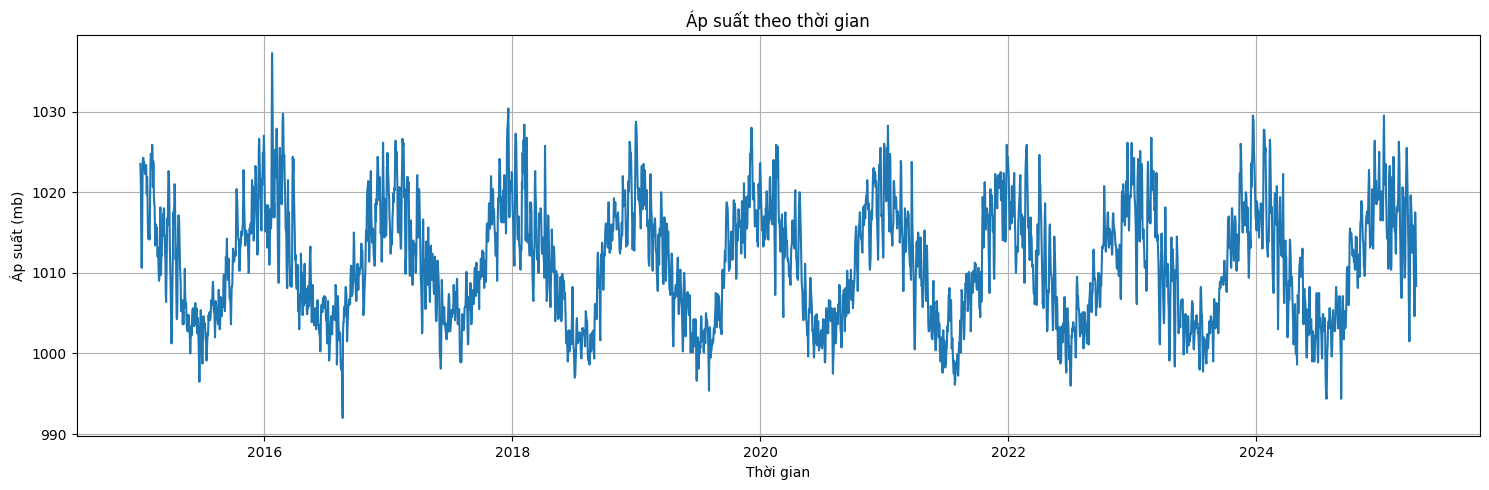

In [26]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Date', y='Pressure')
plt.title('Áp suất theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Áp suất (mb)')
plt.grid(True)
plt.tight_layout()
plt.savefig(f'../Visualization/Data_after_process/Pressure_processed.png')
plt.show()

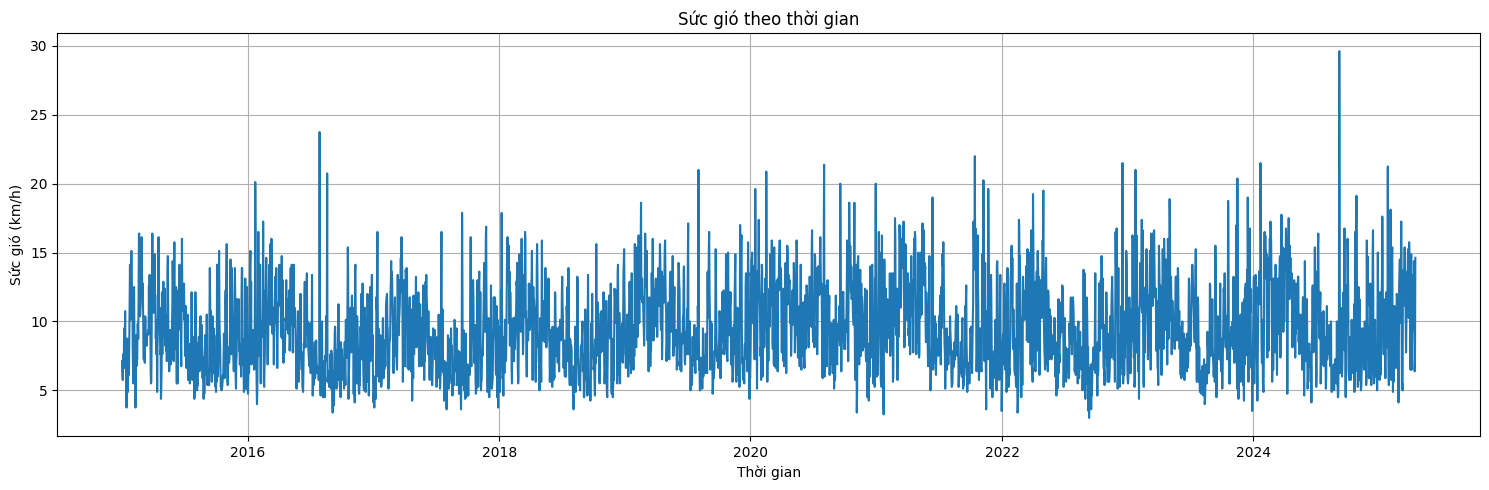

In [27]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Date', y='Wind')
plt.title('Sức gió theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Sức gió (km/h)')
plt.grid(True)
plt.tight_layout()
plt.savefig(f'../Visualization/Data_after_process/Wind_processed.png')
plt.show()

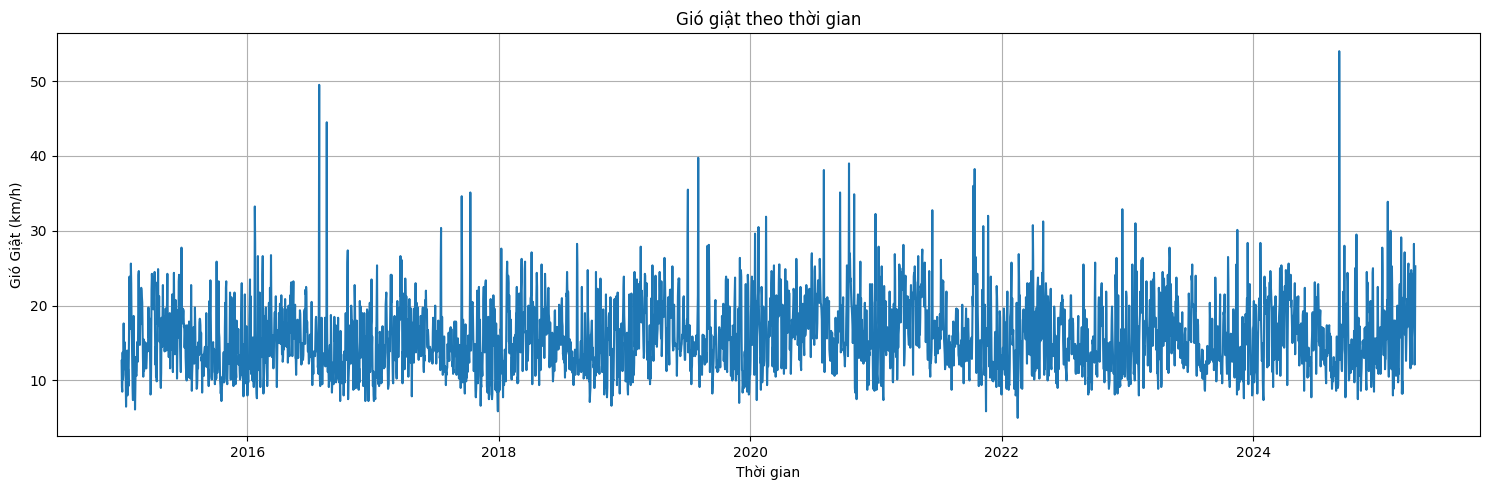

In [28]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Date', y='Gust')
plt.title('Gió giật theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Gió Giật (km/h)')
plt.grid(True)
plt.tight_layout()
plt.savefig(f'../Visualization/Data_after_process/Gust_processed.png')
plt.show()